In [1]:
import pandas as pd

train_df = pd.read_csv('data/features/feat_train_total_msrp.csv')
test_df = pd.read_csv('data/features/feat_test_total_msrp.csv')
test_100_df = pd.read_csv('data/features/feat_test_100_total_msrp.csv')

train_df = train_df[['amr1','amr2','label']]
test_100_df = test_100_df[['amr1','amr2','label']]
test_df = test_df[['amr1','amr2','label']]

In [2]:

import string
import penman

def extract_concepts(amr):
    graph = penman.decode(amr)
    words = [node[2] for node in graph.instances()]
    # words = [word.replace('-', '').rstrip('0123456789') for word in words]
    for triple in graph.triples:
        if triple[1].startswith((":op", ":time")):
            if triple[2][0] == "z" and not triple[2][1:].isdigit():
                words.append(triple[2])
            elif triple[2][0] != "z":
                words.append(triple[2])
        elif triple[1].startswith(":wiki") and triple[2] != "-":
            words.append(triple[2])
    return words


def merge_two_amr(amr1, amr2):
    g1 = penman.decode(amr1)
    g2 = penman.decode(amr2)
    g2 = [('y' + triple[0][1:], triple[1], triple[2]) for triple in g2.triples]
    for triple in g2.copy():
        if (triple[2].startswith('z') and triple[2][1:].isdigit()):
            g2.append((triple[0], triple[1], 'y' + triple[2][1:]))
            g2.remove(triple)
    for triple in g2:
        if triple not in g1.triples:
            g1.triples.append(triple)
            
    words = []
    for triple in g1.instances():
        ada = False
        for tup in words:
            if tup[1] == triple[2]:
                ada = True
        if not ada:
            words.append((triple[0],triple[2]))
    words = dict(words)
    graph = g1.triples.copy()
    graph_merged = graph.copy()

    for triple in graph:
        if triple[0] not in words:
            for inner in graph:
                if triple[0]==inner[0] and inner[1]==':instance':
                    for v,i in words.items():
                        if i==inner[2]:
                            change = triple[0]
                            to = v  
                            temp = graph_merged.copy()
                            for supinner in temp:
                                if supinner[0]==change:
                                    graph_merged.append((to, supinner[1], supinner[2]))
                                    graph_merged.remove(supinner)
                            temp = graph_merged.copy()
                            for supinner in temp:    
                                if supinner[2]==change:
                                    graph_merged.append((supinner[0], supinner[1], to))
                                    graph_merged.remove(supinner)
    return graph_merged 

In [3]:
train_df['concepts_amr1'] = train_df['amr1'].apply(extract_concepts)
train_df['concepts_amr2'] = train_df['amr2'].apply(extract_concepts)
train_df['concepts_amr1'] = train_df['concepts_amr1'].apply(' '.join)
train_df['concepts_amr2'] = train_df['concepts_amr2'].apply(' '.join)
train_df['merged_amr'] = train_df.apply(lambda row: merge_two_amr(row['amr1'], row['amr2']), axis=1)

test_100_df['concepts_amr1'] = test_100_df['amr1'].apply(extract_concepts)
test_100_df['concepts_amr2'] = test_100_df['amr2'].apply(extract_concepts)
test_100_df['concepts_amr1'] = test_100_df['concepts_amr1'].apply(' '.join)
test_100_df['concepts_amr2'] = test_100_df['concepts_amr2'].apply(' '.join)
test_100_df['merged_amr'] = test_100_df.apply(lambda row: merge_two_amr(row['amr1'], row['amr2']), axis=1)

test_df['concepts_amr1'] = test_df['amr1'].apply(extract_concepts)
test_df['concepts_amr2'] = test_df['amr2'].apply(extract_concepts)
test_df['concepts_amr1'] = test_df['concepts_amr1'].apply(' '.join)
test_df['concepts_amr2'] = test_df['concepts_amr2'].apply(' '.join)
test_df['merged_amr'] = test_df.apply(lambda row: merge_two_amr(row['amr1'], row['amr2']), axis=1)


cannot deinvert attribute: ('z8', ':part-of', 'z5')
ignoring epigraph data for duplicate triple: ('z3', ':wiki', '-')
ignoring epigraph data for duplicate triple: ('z0', ':ARG0', 'z1')
ignoring epigraph data for duplicate triple: ('z7', ':wiki', '-')
ignoring epigraph data for duplicate triple: ('z3', ':wiki', '-')
ignoring epigraph data for duplicate triple: ('z3', ':wiki', '-')
ignoring epigraph data for duplicate triple: ('z1005', ':op1', '"entitas-laju"')
ignoring epigraph data for duplicate triple: ('z1005', ':value', '"entitas-ordinal"')
ignoring epigraph data for duplicate triple: ('z1005', ':value', '"entitas-ordinal"')
ignoring epigraph data for duplicate triple: ('z1005', ':value', '"entitas-ordinal"')
ignoring epigraph data for duplicate triple: ('z1005', ':value', '"entitas-ordinal"')
ignoring epigraph data for duplicate triple: ('z1005', ':value', '"entitas-ordinal"')
ignoring epigraph data for duplicate triple: ('z1033', ':op1', '"entitas-lajualannama"')
ignoring epigraph

In [5]:
train_df.to_csv('data/features/merged_amr_train.csv', index=False)
test_100_df.to_csv('data/features/merged_amr_test_100.csv', index=False)
test_df.to_csv('data/features/merged_amr_test.csv', index=False)

In [8]:
help(test_df.iloc[0,5])

Help on list object:

class list(object)
 |  list(iterable=(), /)
 |  
 |  Built-in mutable sequence.
 |  
 |  If no argument is given, the constructor creates a new empty list.
 |  The argument must be an iterable if specified.
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __iadd__(self, value, /)
 |      Implement self+=value.
 |  
 |  __imul__(self, value, /)
 |      Implement self*=value.
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate sign

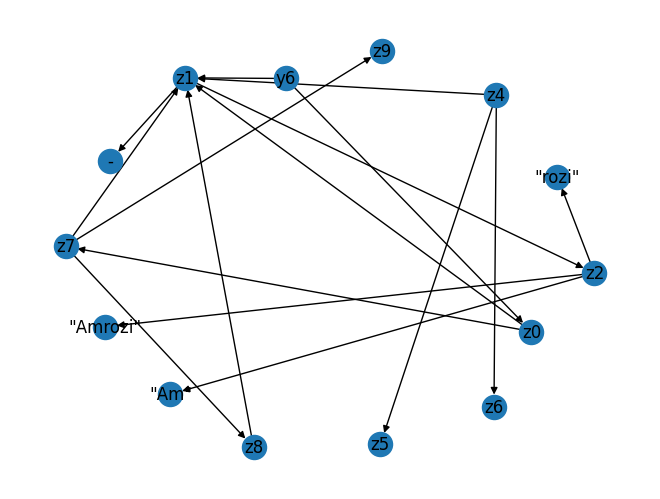

In [30]:
import networkx as nx
import matplotlib.pyplot as plt

def get_instance(v, triples):
    for triple in triples:
        if triple[0]==v and triple[1]==":instance":
            return triple[2]

G = nx.DiGraph()
for triple in train_df.loc[0]['merged_amr']:
    if triple[1] != ':instance':
        # print(triple[0])
        # print(triple[2])
        G.add_edge(triple[0], triple[2])

# mapping = {}
# for node in G.nodes:
#     if (node[0]=="z" or node[0]=="y") and node[1:].isdigit():
#         mapping[node] = get_instance(node, train_df.loc[0]['merged_amr'])
# G = nx.relabel_nodes(G, mapping)
pagerank = nx.pagerank(G, alpha=0.85, max_iter=1000)
pos = nx.spring_layout(G, k=10) # 'k' mengontrol jarak antar node
nx.draw(G, pos, with_labels=True)

plt.show()


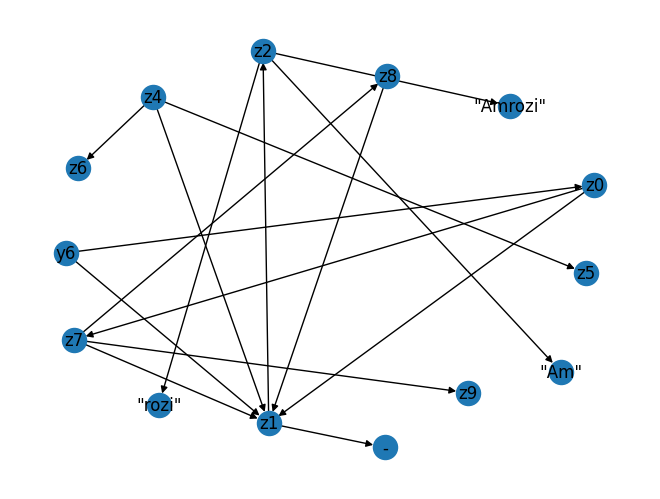

In [24]:
import networkx as nx
import matplotlib.pyplot as plt

def get_instance(v, triples):
    for triple in triples:
        if triple[0]==v and triple[1]==":instance":
            return triple[2]

G = nx.DiGraph()
for triple in train_df.loc[0]['merged_amr']:
    if triple[1] != ':instance':
        # print(triple[0])
        # print(triple[2])
        G.add_edge(triple[0], triple[2])

# mapping = {}
# for node in G.nodes:
#     if (node[0]=="z" or node[0]=="y") and node[1:].isdigit():
#         mapping[node] = get_instance(node, train_df.loc[0]['merged_amr'])
# G = nx.relabel_nodes(G, mapping)
pagerank = nx.pagerank(G, alpha=0.85, max_iter=1000)
pos = nx.spring_layout(G, k=10) # 'k' mengontrol jarak antar node
nx.draw(G, pos, with_labels=True)

plt.show()


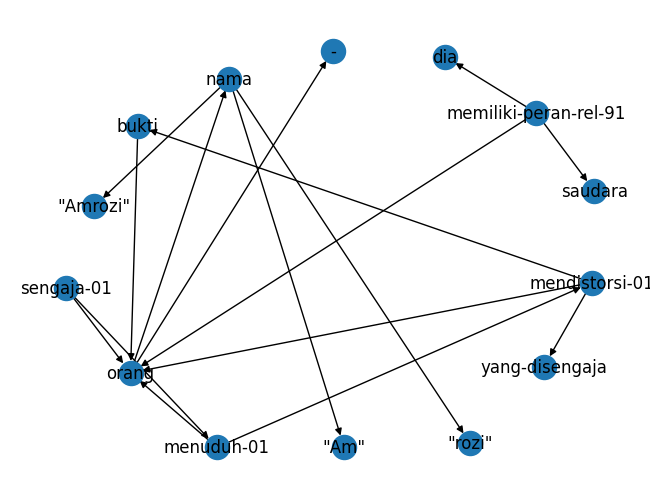

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

def get_instance(v, triples):
    for triple in triples:
        if triple[0]==v and triple[1]==":instance":
            return triple[2]

G = nx.DiGraph()
for triple in train_df.loc[0]['merged_amr']:
    if triple[1] != ':instance':
        G.add_edge(triple[0], triple[2])

mapping = {}
for node in G.nodes:
    if (node[0]=="z" or node[0]=="y") and node[1:].isdigit():
        mapping[node] = get_instance(node, train_df.loc[0]['merged_amr'])
G = nx.relabel_nodes(G, mapping)
pagerank = nx.pagerank(G, alpha=0.85, max_iter=1000)
pos = nx.spring_layout(G, k=10) # 'k' mengontrol jarak antar node
nx.draw(G, pos, with_labels=True)

plt.show()


In [11]:

import numpy as np
import math
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import vstack, hstack, csr_matrix
import networkx as nx
import penman
import re

def calculate_pagerank(graph_merged):
    G = nx.DiGraph()
    for triple in graph_merged:
        if(triple[1] != ':instance'):
            G.add_edge(triple[0], triple[2])
    pagerank = nx.pagerank(G, alpha=0.85, max_iter=1000)
    return pagerank, G.number_of_nodes()

def extr_feat(df_train, df_test, factor=False, n_comp=100, inductive=True):
    df_train = df_train.copy()
    df_test = df_test.copy()
    if inductive:
        all_sent = np.concatenate([df_train['concepts_amr1'], df_train['concepts_amr2']])
    else:
        all_sent = np.concatenate([df_train['concepts_amr1'], df_train['concepts_amr2'],
                                    df_test['concepts_amr1'], df_test['concepts_amr2']])
    vec = CountVectorizer(token_pattern=r'\b\w[\w-]*\b')
    vec.fit(all_sent)

    X1_train = vec.transform(df_train['concepts_amr1'])
    X2_train = vec.transform(df_train['concepts_amr2'])
    X1_train = X1_train.astype(float)
    X2_train = X2_train.astype(float)
    for index, row in df_train.iterrows():
        amr = row['merged_amr']        
        pagerank, n_nodes = calculate_pagerank(amr)
        print("jumlah nodes ", n_nodes)
        for node in pagerank:
            for triple in amr:
                if ((triple[0] == node) and (triple[1] == ":instance")) or triple[2]==node:
                    word = triple[2]
                    # word = word.replace('-', '').rstrip('0123456789')
                    word = re.sub(r'[^A-Za-z0-9-]', '', word)
                    word = word.lower()
                    if word in vec.vocabulary_:
                        loc_word = vec.vocabulary_[word]
                        X1_train[index, loc_word] *= (pagerank[node] * n_nodes)
                        X2_train[index, loc_word] *= (pagerank[node] * n_nodes)
    
    X1_test = vec.transform(df_test['concepts_amr1'])
    X2_test = vec.transform(df_test['concepts_amr2'])
    X1_test = X1_test.astype(float)
    X2_test = X2_test.astype(float)
    for index, row in df_test.iterrows():
        amr = row['merged_amr']        
        pagerank, n_nodes = calculate_pagerank(amr)
        print("jumlah nodes ", n_nodes)
        for node in pagerank:
            for triple in amr:
                if ((triple[0] == node) and (triple[1] == ":instance")) or triple[2]==node:
                    word = triple[2]
                    # word = word.replace('-', '').rstrip('0123456789')
                    word = re.sub(r'[^A-Za-z0-9-]', '', word)
                    word = word.lower()
                    if word in vec.vocabulary_:
                        loc_word = vec.vocabulary_[word]
                        X1_test[index, loc_word] *= (pagerank[node] * n_nodes)
                        X2_test[index, loc_word] *= (pagerank[node] * n_nodes)
    
    X_train = vstack((X1_train, X2_train))
    print("vocab size:" ,len(vec.vocabulary_))
    if (factor):
        n_components = math.floor(n_comp * len(vec.vocabulary_))
    else:
        n_components = n_comp
    lsa = TruncatedSVD(n_components=n_components, random_state=42)
    X_train = lsa.fit_transform(X_train)
    
    X_train = np.vsplit(X_train, 2)
    sum_res = X_train[0] + X_train[1]
    diff_res = np.abs(X_train[0] - X_train[1])
    feat_1_train = np.column_stack((sum_res, diff_res))
    feat_1_train = csr_matrix(feat_1_train)
    # print(feat_1_train.shape)
    # lsa_df_train = pd.DataFrame(feat_1_train.tolist(), columns=[f'f{i}' for i in range(feat_1_train.shape[1])], index=df_train.index)
    # lsa_df_train['label'] = df_train['label']

    X1_test = lsa.transform(X1_test)
    X2_test = lsa.transform(X2_test)
    sum_res = X1_test + X2_test
    diff_res = np.abs(X1_test - X2_test)
    feat_1_test = np.column_stack((sum_res, diff_res))
    feat_1_test = csr_matrix(feat_1_test)
    # print(feat_1_test.shape)
    # lsa_df_test = pd.DataFrame(feat_1_test.tolist(), columns=[f'f{i}' for i in range(feat_1_test.shape[1])], index=df_test.index)
    # lsa_df_test['label'] = df_test['label']
    
    return feat_1_train, feat_1_test


In [13]:



import numpy as np
import math
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import vstack, hstack, csr_matrix
import networkx as nx
import re

def calculate_pagerank(graph_merged):
    G = nx.DiGraph()
    for triple in graph_merged:
        if(triple[1] != ':instance'):
            G.add_edge(triple[0], triple[2])
    pagerank = nx.pagerank(G, alpha=0.85, max_iter=1000)
    return pagerank

def extr_tf(df_train, df_test, inductive=True):
    df_train = df_train.copy()
    df_test = df_test.copy()
    if inductive:
        all_sent = np.concatenate([df_train['concepts_amr1'], df_train['concepts_amr2']])
    else:
        all_sent = np.concatenate([df_train['concepts_amr1'], df_train['concepts_amr2'],
                                    df_test['concepts_amr1'], df_test['concepts_amr2']])
    vec = CountVectorizer(token_pattern=r'\b\w[\w-]*\b')
    vec.fit(all_sent)

    X1_train = vec.transform(df_train['concepts_amr1'])
    X2_train = vec.transform(df_train['concepts_amr2'])
    X1_train = X1_train.astype(float)
    X2_train = X2_train.astype(float)
    for index, row in df_train.iterrows():
        amr = row['merged_amr']        
        pagerank = calculate_pagerank(amr)
        # print("jumlah nodes ", n_nodes)
        # print("X1 train before\n", X1_train)
        # feature_names = vec.get_feature_names_out()
        # for doc_idx in range(X1_train.shape[0]):
        #     row = X1_train[doc_idx]
        #     indices = row.nonzero()[1]
        #     frequencies = row.data
        #     for idx, freq in zip(indices, frequencies):
        #         print(f"{feature_names[idx]}: {freq}")
        # print("X2 train before\n", X2_train)
        # for doc_idx in range(X2_train.shape[0]):
        #     row = X2_train[doc_idx]
        #     indices = row.nonzero()[1]
        #     frequencies = row.data
        #     for idx, freq in zip(indices, frequencies):
        #         print(f"{feature_names[idx]}: {freq}")
        # print("pagerank\n", pagerank)
        for node in pagerank:
            for triple in amr:
                if ((triple[0] == node) and (triple[1] == ":instance")) or triple[2]==node:
                    word = triple[2]
                    # word = word.replace('-', '').rstrip('0123456789')
                    word = re.sub(r'[^A-Za-z0-9-]', '', word)
                    word = word.lower()
                    if word in vec.vocabulary_:
                        loc_word = vec.vocabulary_[word]
                        X1_train[index, loc_word] *= (pagerank[node])
                        X2_train[index, loc_word] *= (pagerank[node])
        # print("X1 train after\n", X1_train)
        # for doc_idx in range(X1_train.shape[0]):
        #     row = X1_train[doc_idx]
        #     indices = row.nonzero()[1]
        #     frequencies = [f for f in row.data if f!=0]
        #     for idx, freq in zip(indices, frequencies):
        #         print(f"{feature_names[idx]}: {freq}")
        # print("X2 train after\n", X2_train)
        # for doc_idx in range(X2_train.shape[0]):
        #     row = X2_train[doc_idx]
        #     indices = row.nonzero()[1]
        #     frequencies = [f for f in row.data if f!=0]
        #     for idx, freq in zip(indices, frequencies):
        #         print(f"{feature_names[idx]}: {freq}")
    X1_test = vec.transform(df_test['concepts_amr1'])
    X2_test = vec.transform(df_test['concepts_amr2'])
    X1_test = X1_test.astype(float)
    X2_test = X2_test.astype(float)
    for index, row in df_test.iterrows():
        amr = row['merged_amr']        
        pagerank = calculate_pagerank(amr)
        # print("jumlah nodes ", n_nodes)
        # print("X1 train before\n", X1_train)
        # print("X2 train before\n", X2_train)
        # print("pagerank\n", pagerank)
        for node in pagerank:
            for triple in amr:
                if ((triple[0] == node) and (triple[1] == ":instance")) or triple[2]==node:
                    word = triple[2]
                    # word = word.replace('-', '').rstrip('0123456789')
                    word = re.sub(r'[^A-Za-z0-9-]', '', word)
                    word = word.lower()
                    # print(word)
                    if word in vec.vocabulary_:
                        loc_word = vec.vocabulary_[word]
                        X1_test[index, loc_word] *= (pagerank[node])
                        X2_test[index, loc_word] *= (pagerank[node])
        # print("X1 test after")
        # for doc_idx in range(X1_test.shape[0]):
        #     row = X1_test[doc_idx]
        #     indices = row.nonzero()[1]
        #     frequencies = [f for f in row.data if f!=0]
        #     for idx, freq in zip(indices, frequencies):
        #         print(f"{feature_names[idx]}: {freq}")
        # print("X2 test after")
        # for doc_idx in range(X2_test.shape[0]):
        #     row = X2_test[doc_idx]
        #     indices = row.nonzero()[1]
        #     frequencies = [f for f in row.data if f!=0]
        #     for idx, freq in zip(indices, frequencies):
        #         print(f"{feature_names[idx]}: {freq}")
    
    X_train = vstack((X1_train, X2_train))
    print("vocab size:" ,len(vec.vocabulary_))
    return X_train, X1_test, X2_test, vec

def extr_lsa(X_train, X1_test, X2_test, vec, factor=False, n_comp=100):
    if (factor):
        n_components = math.floor(n_comp * len(vec.vocabulary_))
    else:
        n_components = n_comp
    lsa = TruncatedSVD(n_components=n_components, random_state=42)
    X_train = lsa.fit_transform(X_train)
    
    X_train = np.vsplit(X_train, 2)
    sum_res = X_train[0] + X_train[1]
    diff_res = np.abs(X_train[0] - X_train[1])
    feat_1_train = np.column_stack((sum_res, diff_res))
    feat_1_train = csr_matrix(feat_1_train)
    # print(feat_1_train.shape)
    # lsa_df_train = pd.DataFrame(feat_1_train.tolist(), columns=[f'f{i}' for i in range(feat_1_train.shape[1])], index=df_train.index)
    # lsa_df_train['label'] = df_train['label']

    X1_test = lsa.transform(X1_test)
    X2_test = lsa.transform(X2_test)
    sum_res = X1_test + X2_test
    diff_res = np.abs(X1_test - X2_test)
    feat_1_test = np.column_stack((sum_res, diff_res))
    feat_1_test = csr_matrix(feat_1_test)
    # print(feat_1_test.shape)
    # lsa_df_test = pd.DataFrame(feat_1_test.tolist(), columns=[f'f{i}' for i in range(feat_1_test.shape[1])], index=df_test.index)
    # lsa_df_test['label'] = df_test['label']
    
    return feat_1_train, feat_1_test


In [10]:



import numpy as np
import math
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import vstack, hstack, csr_matrix
import networkx as nx
import re

def calculate_pagerank(graph_merged):
    G = nx.DiGraph()
    for triple in graph_merged:
        if(triple[1] != ':instance'):
            G.add_edge(triple[0], triple[2])
    pagerank = nx.pagerank(G, alpha=0.85, max_iter=1000)
    return pagerank

def extr_tf(df_train, df_test, factor=False, n_comp=100, inductive=True):
    df_train = df_train.copy()
    df_test = df_test.copy()
    if inductive:
        all_sent = np.concatenate([df_train['concepts_amr1'], df_train['concepts_amr2']])
    else:
        all_sent = np.concatenate([df_train['concepts_amr1'], df_train['concepts_amr2'],
                                    df_test['concepts_amr1'], df_test['concepts_amr2']])
    vec = CountVectorizer(token_pattern=r'\b\w[\w-]*\b')
    vec.fit(all_sent)

    X1_train = vec.transform(df_train['concepts_amr1'])
    X2_train = vec.transform(df_train['concepts_amr2'])
    X1_train = X1_train.astype(float)
    X2_train = X2_train.astype(float)
    for index, row in df_train.iterrows():
        amr = row['merged_amr']        
        pagerank = calculate_pagerank(amr)
        for node in pagerank:
            for triple in amr:
                if ((triple[0] == node) and (triple[1] == ":instance")) or triple[2]==node:
                    word = triple[2]
                    word = re.sub(r'[^A-Za-z0-9-]', '', word)
                    word = word.lower()
                    if word in vec.vocabulary_:
                        loc_word = vec.vocabulary_[word]
                        X1_train[index, loc_word] *= (pagerank[node])
                        X2_train[index, loc_word] *= (pagerank[node])
        
    X1_test = vec.transform(df_test['concepts_amr1'])
    X2_test = vec.transform(df_test['concepts_amr2'])
    X1_test = X1_test.astype(float)
    X2_test = X2_test.astype(float)
    for index, row in df_test.iterrows():
        amr = row['merged_amr']        
        pagerank = calculate_pagerank(amr)
        for node in pagerank:
            for triple in amr:
                if ((triple[0] == node) and (triple[1] == ":instance")) or triple[2]==node:
                    word = triple[2]
                    word = re.sub(r'[^A-Za-z0-9-]', '', word)
                    word = word.lower()
                    if word in vec.vocabulary_:
                        loc_word = vec.vocabulary_[word]
                        X1_test[index, loc_word] *= (pagerank[node])
                        X2_test[index, loc_word] *= (pagerank[node])
    
    X_train = vstack((X1_train, X2_train))
    if (factor):
        n_components = math.floor(n_comp * len(vec.vocabulary_))
    else:
        n_components = n_comp
    lsa = TruncatedSVD(n_components=n_components, random_state=42)
    X_train = lsa.fit_transform(X_train)
    
    X_train = np.vsplit(X_train, 2)
    sum_res = X_train[0] + X_train[1]
    diff_res = np.abs(X_train[0] - X_train[1])
    feat_1_train = np.column_stack((sum_res, diff_res))
    feat_1_train = csr_matrix(feat_1_train)

    X1_test = lsa.transform(X1_test)
    X2_test = lsa.transform(X2_test)
    sum_res = X1_test + X2_test
    diff_res = np.abs(X1_test - X2_test)
    feat_1_test = np.column_stack((sum_res, diff_res))
    feat_1_test = csr_matrix(feat_1_test)

    return feat_1_train, feat_1_test


# SVM

In [32]:
X_train_secured, X1_test_secured, X2_test_secured, vec = extr_tf(train_df, test_100_df, inductive=True)

/home/faizmuh/miniconda3/envs/skripsi/lib/python3.10/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


vocab size: 11961


In [33]:
train, test = extr_lsa(X_train_secured, X1_test_secured, X2_test_secured, vec, factor=True, n_comp=1/100)
X_train = train
y_train = train_df['label']

In [39]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train)

[I 2024-06-29 16:24:43,595] A new study created in memory with name: no-name-77c1b5ca-c8e3-4cd7-a2ab-b54a91c07c85
[I 2024-06-29 16:25:21,875] Trial 0 finished with value: 0.4688127864107209 and parameters: {'svc__C': 1.0, 'svc__kernel': 'linear', 'svc__gamma': 1.0, 'svc__degree': 3}. Best is trial 0 with value: 0.4688127864107209.
[I 2024-06-29 16:25:55,839] Trial 1 finished with value: 0.4618836845490163 and parameters: {'svc__C': 0.11030681128287596, 'svc__kernel': 'linear', 'svc__gamma': 0.005103684489318945, 'svc__degree': 3}. Best is trial 0 with value: 0.4688127864107209.
[I 2024-06-29 16:26:28,558] Trial 2 finished with value: 0.41836378396580753 and parameters: {'svc__C': 0.00311649208297643, 'svc__kernel': 'linear', 'svc__gamma': 0.006538779280740505, 'svc__degree': 3}. Best is trial 0 with value: 0.4688127864107209.
[I 2024-06-29 16:27:00,481] Trial 3 finished with value: 0.5400697642328711 and parameters: {'svc__C': 4.176900752194749, 'svc__kernel': 'rbf', 'svc__gamma': 6.12

Akurasi: 0.632
Presisi: 0.571
Recall: 0.567
F1 validasi: 0.568
Confusion Matrix:
[[101 164]
 [136 415]]


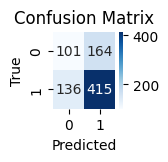

{'svc__C': 856.3065677540635, 'svc__kernel': 'rbf', 'svc__gamma': 0.30643527317333025, 'svc__degree': 3}


In [35]:
import classifiers.svm as svm

study, model = svm.find_best_param_svm(X_train, y_train, n_trials=100, timeout=300)

[I 2024-06-29 16:30:54,981] A new study created in memory with name: no-name-1e530985-cf25-4b32-a9a0-9477c8842bc8
[I 2024-06-29 16:31:29,491] Trial 0 finished with value: 0.4688127864107209 and parameters: {'svc__C': 1.0, 'svc__kernel': 'linear', 'svc__gamma': 1.0, 'svc__degree': 3}. Best is trial 0 with value: 0.4688127864107209.
[I 2024-06-29 16:32:07,785] Trial 1 finished with value: 0.5565884913917494 and parameters: {'svc__C': 856.3065677540635, 'svc__kernel': 'rbf', 'svc__gamma': 0.30643527317333025, 'svc__degree': 3}. Best is trial 1 with value: 0.5565884913917494.
[I 2024-06-29 16:32:51,254] Trial 2 finished with value: 0.5431786577171833 and parameters: {'svc__C': 193.58406693687454, 'svc__kernel': 'rbf', 'svc__gamma': 0.4007339878919736, 'svc__degree': 3}. Best is trial 1 with value: 0.5565884913917494.
[I 2024-06-29 16:33:26,109] Trial 3 finished with value: 0.5101751781430266 and parameters: {'svc__C': 7.018328886359125, 'svc__kernel': 'rbf', 'svc__gamma': 0.401227332783752

Akurasi: 0.632
Presisi: 0.571
Recall: 0.567
F1 validasi: 0.568
Confusion Matrix:
[[101 164]
 [136 415]]


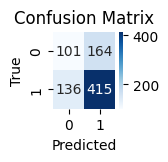

{'svc__C': 856.3065677540635, 'svc__kernel': 'rbf', 'svc__gamma': 0.30643527317333025, 'svc__degree': 3}


In [37]:
import classifiers.svm as svm

list_param = [{'svc__C': 856.3065677540635, 'svc__kernel': 'rbf', 'svc__gamma': 0.30643527317333025, 'svc__degree': 3}]
study, model = svm.find_best_param_svm(X_train, y_train, timeout=300, list_param=list_param)

[I 2024-06-29 16:57:45,528] A new study created in memory with name: no-name-23f487e4-bd33-44d0-b736-b769212bfca2
[I 2024-06-29 16:58:17,791] Trial 0 finished with value: 0.46422679552664015 and parameters: {'svc__C': 1.0, 'svc__kernel': 'linear', 'svc__gamma': 1.0, 'svc__degree': 3}. Best is trial 0 with value: 0.46422679552664015.
[I 2024-06-29 16:58:49,537] Trial 1 finished with value: 0.5590762399485206 and parameters: {'svc__C': 856.3065677540635, 'svc__kernel': 'rbf', 'svc__gamma': 0.30643527317333025, 'svc__degree': 3}. Best is trial 1 with value: 0.5590762399485206.
[I 2024-06-29 16:59:21,970] Trial 2 finished with value: 0.4539084493947539 and parameters: {'svc__C': 0.12536756839370508, 'svc__kernel': 'linear', 'svc__gamma': 4.407495150860149, 'svc__degree': 3}. Best is trial 1 with value: 0.5590762399485206.
[I 2024-06-29 16:59:57,090] Trial 3 finished with value: 0.4247895640175555 and parameters: {'svc__C': 0.17205717427863593, 'svc__kernel': 'rbf', 'svc__gamma': 0.00026410

Akurasi: 0.632
Presisi: 0.576
Recall: 0.574
F1 validasi: 0.575
Confusion Matrix:
[[108 157]
 [143 408]]


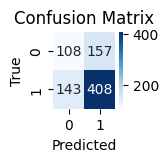

{'svc__C': 856.3065677540635, 'svc__kernel': 'rbf', 'svc__gamma': 0.30643527317333025, 'svc__degree': 3}


In [40]:
import classifiers.svm as svm

list_param = [{'svc__C': 856.3065677540635, 'svc__kernel': 'rbf', 'svc__gamma': 0.30643527317333025, 'svc__degree': 3}]
study, model = svm.find_best_param_svm(X_train_scaled, y_train, timeout=300, list_param=list_param)

In [42]:
import classifiers.svm as svm
# from sklearn.preprocessing import MaxAbsScaler

list_i = []
list_f1_svm = []
for i in range(1, 11):
    train, test = extr_lsa(X_train_secured, X1_test_secured, X2_test_secured, vec, factor=True, n_comp=i/100)
    X_train = train
    y_train = train_df['label']
    scaler = MaxAbsScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    param = {'svc__C': 856.3065677540635, 'svc__kernel': 'rbf', 'svc__gamma': 0.30643527317333025, 'svc__degree': 3}
    param = {k:[v] for k,v in param.items()}
    gs, model, f1 = svm.fit_train_loop_svm(X_train_scaled, y_train, param=param)
    list_i.append(i)
    list_f1_svm.append(f1)
    print(i)
    print(f1)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END svc__C=856.3065677540635, svc__degree=3, svc__gamma=0.30643527317333025, svc__kernel=rbf; total time=  12.2s
[CV] END svc__C=856.3065677540635, svc__degree=3, svc__gamma=0.30643527317333025, svc__kernel=rbf; total time=  11.7s
[CV] END svc__C=856.3065677540635, svc__degree=3, svc__gamma=0.30643527317333025, svc__kernel=rbf; total time=  11.6s
[CV] END svc__C=856.3065677540635, svc__degree=3, svc__gamma=0.30643527317333025, svc__kernel=rbf; total time=  11.9s
[CV] END svc__C=856.3065677540635, svc__degree=3, svc__gamma=0.30643527317333025, svc__kernel=rbf; total time=  11.8s
1
0.5748937234308578
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END svc__C=856.3065677540635, svc__degree=3, svc__gamma=0.30643527317333025, svc__kernel=rbf; total time=  27.3s
[CV] END svc__C=856.3065677540635, svc__degree=3, svc__gamma=0.30643527317333025, svc__kernel=rbf; total time=  21.6s
[CV] END svc__C=856.3065677540635, 

In [43]:
list_i[list_f1_svm.index(max(list_f1_svm))]

4

/home/faizmuh/miniconda3/envs/skripsi/lib/python3.10/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


vocab size: 11961
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END svc__C=856.3065677540635, svc__degree=3, svc__gamma=0.30643527317333025, svc__kernel=rbf; total time=  45.9s
[CV] END svc__C=856.3065677540635, svc__degree=3, svc__gamma=0.30643527317333025, svc__kernel=rbf; total time=  40.4s
[CV] END svc__C=856.3065677540635, svc__degree=3, svc__gamma=0.30643527317333025, svc__kernel=rbf; total time=  39.2s
[CV] END svc__C=856.3065677540635, svc__degree=3, svc__gamma=0.30643527317333025, svc__kernel=rbf; total time=  47.5s
[CV] END svc__C=856.3065677540635, svc__degree=3, svc__gamma=0.30643527317333025, svc__kernel=rbf; total time=  52.0s
Akurasi: 0.615
Presisi: 0.571
Recall: 0.575
F1 validasi: 0.572
Confusion Matrix:
[[122 143]
 [171 380]]


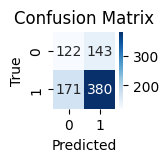

In [45]:
import classifiers.svm as svm

X_train_secured, X1_test_secured, X2_test_secured, vec = extr_tf(train_df, test_100_df, inductive=True)
train, test = extr_lsa(X_train_secured, X1_test_secured, X2_test_secured, vec, factor=True, n_comp=4/100)
X_train = train
y_train = train_df['label']

param = {'svc__C': 856.3065677540635, 'svc__kernel': 'rbf', 'svc__gamma': 0.30643527317333025, 'svc__degree': 3}
param = {k:[v] for k,v in param.items()}
gs, model = svm.fit_train_svm(X_train, y_train, param=param)

/home/faizmuh/miniconda3/envs/skripsi/lib/python3.10/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


vocab size: 12112
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END svc__C=856.3065677540635, svc__degree=3, svc__gamma=0.30643527317333025, svc__kernel=rbf; total time=  35.2s
[CV] END svc__C=856.3065677540635, svc__degree=3, svc__gamma=0.30643527317333025, svc__kernel=rbf; total time=  34.8s
[CV] END svc__C=856.3065677540635, svc__degree=3, svc__gamma=0.30643527317333025, svc__kernel=rbf; total time=  35.0s
[CV] END svc__C=856.3065677540635, svc__degree=3, svc__gamma=0.30643527317333025, svc__kernel=rbf; total time=  35.0s
[CV] END svc__C=856.3065677540635, svc__degree=3, svc__gamma=0.30643527317333025, svc__kernel=rbf; total time=  36.3s
Akurasi: 0.607
Presisi: 0.567
Recall: 0.572
F1 validasi: 0.568
Confusion Matrix:
[[125 140]
 [181 370]]


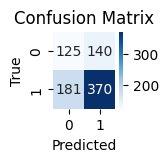

In [46]:
import classifiers.svm as svm

X_train_secured, X1_test_secured, X2_test_secured, vec = extr_tf(train_df, test_100_df, inductive=False)
train, test = extr_lsa(X_train_secured, X1_test_secured, X2_test_secured, vec, factor=True, n_comp=4/100)
X_train = train
y_train = train_df['label']

param = {'svc__C': 856.3065677540635, 'svc__kernel': 'rbf', 'svc__gamma': 0.30643527317333025, 'svc__degree': 3}
param = {k:[v] for k,v in param.items()}
gs, model = svm.fit_train_svm(X_train, y_train, param=param)

/home/faizmuh/miniconda3/envs/skripsi/lib/python3.10/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


vocab size: 11961
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END svc__C=856.3065677540635, svc__degree=3, svc__gamma=0.30643527317333025, svc__kernel=rbf; total time=  45.8s
[CV] END svc__C=856.3065677540635, svc__degree=3, svc__gamma=0.30643527317333025, svc__kernel=rbf; total time=  39.7s
[CV] END svc__C=856.3065677540635, svc__degree=3, svc__gamma=0.30643527317333025, svc__kernel=rbf; total time=  41.9s
[CV] END svc__C=856.3065677540635, svc__degree=3, svc__gamma=0.30643527317333025, svc__kernel=rbf; total time=  43.9s
[CV] END svc__C=856.3065677540635, svc__degree=3, svc__gamma=0.30643527317333025, svc__kernel=rbf; total time=  50.3s
Akurasi: 0.615
Presisi: 0.571
Recall: 0.575
F1 validasi: 0.572
Confusion Matrix:
[[122 143]
 [171 380]]


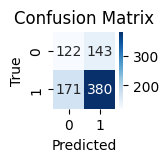

In [7]:
import classifiers.svm as svm

X_train_secured, X1_test_secured, X2_test_secured, vec = extr_tf(train_df, test_df, inductive=True)
train, test = extr_lsa(X_train_secured, X1_test_secured, X2_test_secured, vec, factor=True, n_comp=4/100)
X_train = train
y_train = train_df['label']

param = {'svc__C': 856.3065677540635, 'svc__kernel': 'rbf', 'svc__gamma': 0.30643527317333025, 'svc__degree': 3}
param = {k:[v] for k,v in param.items()}
gs, model = svm.fit_train_svm(X_train, y_train, param=param)

/home/faizmuh/miniconda3/envs/skripsi/lib/python3.10/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


vocab size: 14675
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END svc__C=856.3065677540635, svc__degree=3, svc__gamma=0.30643527317333025, svc__kernel=rbf; total time=  41.2s
[CV] END svc__C=856.3065677540635, svc__degree=3, svc__gamma=0.30643527317333025, svc__kernel=rbf; total time=  41.3s
[CV] END svc__C=856.3065677540635, svc__degree=3, svc__gamma=0.30643527317333025, svc__kernel=rbf; total time=  42.2s
[CV] END svc__C=856.3065677540635, svc__degree=3, svc__gamma=0.30643527317333025, svc__kernel=rbf; total time=  51.6s
[CV] END svc__C=856.3065677540635, svc__degree=3, svc__gamma=0.30643527317333025, svc__kernel=rbf; total time=  45.1s
Akurasi: 0.597
Presisi: 0.546
Recall: 0.547
F1 validasi: 0.546
Confusion Matrix:
[[107 158]
 [171 380]]


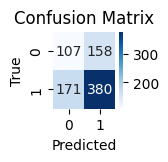

In [47]:
import classifiers.svm as svm

X_train_secured, X1_test_secured, X2_test_secured, vec = extr_tf(train_df, test_df, inductive=False)
train, test = extr_lsa(X_train_secured, X1_test_secured, X2_test_secured, vec, factor=True, n_comp=4/100)
X_train = train
y_train = train_df['label']

param = {'svc__C': 856.3065677540635, 'svc__kernel': 'rbf', 'svc__gamma': 0.30643527317333025, 'svc__degree': 3}
param = {k:[v] for k,v in param.items()}
gs, model = svm.fit_train_svm(X_train, y_train, param=param)

# XGB

In [48]:
X_train_secured, X1_test_secured, X2_test_secured, vec = extr_tf(train_df, test_100_df, inductive=True)

/home/faizmuh/miniconda3/envs/skripsi/lib/python3.10/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


vocab size: 11961


In [49]:
train, test = extr_lsa(X_train_secured, X1_test_secured, X2_test_secured, vec, factor=True, n_comp=1/100)
X_train = train
y_train = train_df['label']

[I 2024-06-29 19:23:49,834] A new study created in memory with name: no-name-0d55e04b-b9e8-4e77-8012-4f63220b79f1
[I 2024-06-29 19:24:22,223] Trial 0 finished with value: 0.552722328412244 and parameters: {'xgbclassifier__eta': 0.3, 'xgbclassifier__n_estimators': 100, 'xgbclassifier__max_depth': 6, 'xgbclassifier__learning_rate': 0.3, 'xgbclassifier__subsample': 1.0, 'xgbclassifier__colsample_bytree': 1.0, 'xgbclassifier__min_child_weight': 1, 'xgbclassifier__gamma': 0.0, 'xgbclassifier__reg_lambda': 1.0, 'xgbclassifier__objective': 'reg:squarederror'}. Best is trial 0 with value: 0.552722328412244.
[I 2024-06-29 19:24:54,675] Trial 1 finished with value: 0.587726447193823 and parameters: {'xgbclassifier__eta': 0.10956403322577613, 'xgbclassifier__n_estimators': 389, 'xgbclassifier__max_depth': 4, 'xgbclassifier__learning_rate': 0.011943270788670229, 'xgbclassifier__subsample': 0.5322246273506048, 'xgbclassifier__colsample_bytree': 0.7645849850697513, 'xgbclassifier__min_child_weight':

Akurasi: 0.661
Presisi: 0.606
Recall: 0.600
F1 validasi: 0.602
Confusion Matrix:
[[113 152]
 [125 426]]


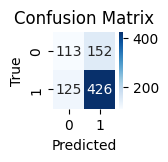

{'xgbclassifier__eta': 0.10956403322577613, 'xgbclassifier__n_estimators': 389, 'xgbclassifier__max_depth': 4, 'xgbclassifier__learning_rate': 0.011943270788670229, 'xgbclassifier__subsample': 0.5322246273506048, 'xgbclassifier__colsample_bytree': 0.7645849850697513, 'xgbclassifier__min_child_weight': 4, 'xgbclassifier__gamma': 3.407729229089508, 'xgbclassifier__reg_lambda': 3.419721702364318, 'xgbclassifier__objective': 'binary:hinge'}


In [50]:
import classifiers.xgb as xgb

study, model = xgb.find_best_param_xgb(X_train, y_train, n_trials=100, timeout=300)

[I 2024-06-29 19:31:45,515] A new study created in memory with name: no-name-9b54bb1b-990c-4180-b277-80a4706c2a15
[I 2024-06-29 19:32:09,622] Trial 0 finished with value: 0.552722328412244 and parameters: {'xgbclassifier__eta': 0.3, 'xgbclassifier__n_estimators': 100, 'xgbclassifier__max_depth': 6, 'xgbclassifier__learning_rate': 0.3, 'xgbclassifier__subsample': 1.0, 'xgbclassifier__colsample_bytree': 1.0, 'xgbclassifier__min_child_weight': 1, 'xgbclassifier__gamma': 0.0, 'xgbclassifier__reg_lambda': 1.0, 'xgbclassifier__objective': 'reg:squarederror'}. Best is trial 0 with value: 0.552722328412244.
[I 2024-06-29 19:32:33,946] Trial 1 finished with value: 0.587726447193823 and parameters: {'xgbclassifier__eta': 0.10956403322577613, 'xgbclassifier__n_estimators': 389, 'xgbclassifier__max_depth': 4, 'xgbclassifier__learning_rate': 0.011943270788670229, 'xgbclassifier__subsample': 0.5322246273506048, 'xgbclassifier__colsample_bytree': 0.7645849850697513, 'xgbclassifier__min_child_weight':

Akurasi: 0.661
Presisi: 0.606
Recall: 0.600
F1 validasi: 0.602
Confusion Matrix:
[[113 152]
 [125 426]]


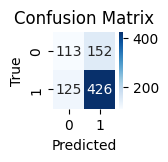

{'xgbclassifier__eta': 0.10956403322577613, 'xgbclassifier__n_estimators': 389, 'xgbclassifier__max_depth': 4, 'xgbclassifier__learning_rate': 0.011943270788670229, 'xgbclassifier__subsample': 0.5322246273506048, 'xgbclassifier__colsample_bytree': 0.7645849850697513, 'xgbclassifier__min_child_weight': 4, 'xgbclassifier__gamma': 3.407729229089508, 'xgbclassifier__reg_lambda': 3.419721702364318, 'xgbclassifier__objective': 'binary:hinge'}


In [51]:
list_param = [{'xgbclassifier__eta': 0.10956403322577613, 'xgbclassifier__n_estimators': 389, 'xgbclassifier__max_depth': 4, 'xgbclassifier__learning_rate': 0.011943270788670229, 'xgbclassifier__subsample': 0.5322246273506048, 'xgbclassifier__colsample_bytree': 0.7645849850697513, 'xgbclassifier__min_child_weight': 4, 'xgbclassifier__gamma': 3.407729229089508, 'xgbclassifier__reg_lambda': 3.419721702364318, 'xgbclassifier__objective': 'binary:hinge'}]
study, model = xgb.find_best_param_xgb(X_train, y_train, n_trials=100, timeout=300, list_param=list_param)


[I 2024-06-29 19:39:09,768] A new study created in memory with name: no-name-ac99c77c-9a3a-40ee-94e8-e67c1308914a
[I 2024-06-29 19:39:34,763] Trial 0 finished with value: 0.552722328412244 and parameters: {'xgbclassifier__eta': 0.3, 'xgbclassifier__n_estimators': 100, 'xgbclassifier__max_depth': 6, 'xgbclassifier__learning_rate': 0.3, 'xgbclassifier__subsample': 1.0, 'xgbclassifier__colsample_bytree': 1.0, 'xgbclassifier__min_child_weight': 1, 'xgbclassifier__gamma': 0.0, 'xgbclassifier__reg_lambda': 1.0, 'xgbclassifier__objective': 'reg:squarederror'}. Best is trial 0 with value: 0.552722328412244.
[I 2024-06-29 19:39:59,094] Trial 1 finished with value: 0.587726447193823 and parameters: {'xgbclassifier__eta': 0.10956403322577613, 'xgbclassifier__n_estimators': 389, 'xgbclassifier__max_depth': 4, 'xgbclassifier__learning_rate': 0.011943270788670229, 'xgbclassifier__subsample': 0.5322246273506048, 'xgbclassifier__colsample_bytree': 0.7645849850697513, 'xgbclassifier__min_child_weight':

Akurasi: 0.661
Presisi: 0.606
Recall: 0.600
F1 validasi: 0.602
Confusion Matrix:
[[113 152]
 [125 426]]


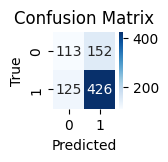

{'xgbclassifier__eta': 0.10956403322577613, 'xgbclassifier__n_estimators': 389, 'xgbclassifier__max_depth': 4, 'xgbclassifier__learning_rate': 0.011943270788670229, 'xgbclassifier__subsample': 0.5322246273506048, 'xgbclassifier__colsample_bytree': 0.7645849850697513, 'xgbclassifier__min_child_weight': 4, 'xgbclassifier__gamma': 3.407729229089508, 'xgbclassifier__reg_lambda': 3.419721702364318, 'xgbclassifier__objective': 'binary:hinge'}


In [52]:
list_param = [{'xgbclassifier__eta': 0.10956403322577613, 'xgbclassifier__n_estimators': 389, 'xgbclassifier__max_depth': 4, 'xgbclassifier__learning_rate': 0.011943270788670229, 'xgbclassifier__subsample': 0.5322246273506048, 'xgbclassifier__colsample_bytree': 0.7645849850697513, 'xgbclassifier__min_child_weight': 4, 'xgbclassifier__gamma': 3.407729229089508, 'xgbclassifier__reg_lambda': 3.419721702364318, 'xgbclassifier__objective': 'binary:hinge'}]
study, model = xgb.find_best_param_xgb(X_train, y_train, n_trials=100, timeout=300, list_param=list_param)


In [53]:
list_i = []
list_f1_xgb = []
for i in range(1, 11):
    train, test = extr_lsa(X_train_secured, X1_test_secured, X2_test_secured, vec, factor=True, n_comp=i/100)
    X_train = train
    y_train = train_df['label']
    param = {'xgbclassifier__eta': 0.10956403322577613, 'xgbclassifier__n_estimators': 389, 'xgbclassifier__max_depth': 4, 'xgbclassifier__learning_rate': 0.011943270788670229, 'xgbclassifier__subsample': 0.5322246273506048, 'xgbclassifier__colsample_bytree': 0.7645849850697513, 'xgbclassifier__min_child_weight': 4, 'xgbclassifier__gamma': 3.407729229089508, 'xgbclassifier__reg_lambda': 3.419721702364318, 'xgbclassifier__objective': 'binary:hinge'}
    param = {k:[v] for k,v in param.items()}
    gs, model, f1 = xgb.fit_train_loop_xgb(X_train, y_train, param=param)
    list_i.append(i)
    list_f1_xgb.append(f1)
    print(i)
    print(f1)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END xgbclassifier__colsample_bytree=0.7645849850697513, xgbclassifier__eta=0.10956403322577613, xgbclassifier__gamma=3.407729229089508, xgbclassifier__learning_rate=0.011943270788670229, xgbclassifier__max_depth=4, xgbclassifier__min_child_weight=4, xgbclassifier__n_estimators=389, xgbclassifier__objective=binary:hinge, xgbclassifier__reg_lambda=3.419721702364318, xgbclassifier__subsample=0.5322246273506048; total time=  17.1s
[CV] END xgbclassifier__colsample_bytree=0.7645849850697513, xgbclassifier__eta=0.10956403322577613, xgbclassifier__gamma=3.407729229089508, xgbclassifier__learning_rate=0.011943270788670229, xgbclassifier__max_depth=4, xgbclassifier__min_child_weight=4, xgbclassifier__n_estimators=389, xgbclassifier__objective=binary:hinge, xgbclassifier__reg_lambda=3.419721702364318, xgbclassifier__subsample=0.5322246273506048; total time=  15.5s
[CV] END xgbclassifier__colsample_bytree=0.7645849850697513, xgbclass

In [54]:
list_i[list_f1_xgb.index(max(list_f1_xgb))]


8

/home/faizmuh/miniconda3/envs/skripsi/lib/python3.10/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


vocab size: 11961
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END xgbclassifier__colsample_bytree=0.7645849850697513, xgbclassifier__eta=0.10956403322577613, xgbclassifier__gamma=3.407729229089508, xgbclassifier__learning_rate=0.011943270788670229, xgbclassifier__max_depth=4, xgbclassifier__min_child_weight=4, xgbclassifier__n_estimators=389, xgbclassifier__objective=binary:hinge, xgbclassifier__reg_lambda=3.419721702364318, xgbclassifier__subsample=0.5322246273506048; total time= 2.3min
[CV] END xgbclassifier__colsample_bytree=0.7645849850697513, xgbclassifier__eta=0.10956403322577613, xgbclassifier__gamma=3.407729229089508, xgbclassifier__learning_rate=0.011943270788670229, xgbclassifier__max_depth=4, xgbclassifier__min_child_weight=4, xgbclassifier__n_estimators=389, xgbclassifier__objective=binary:hinge, xgbclassifier__reg_lambda=3.419721702364318, xgbclassifier__subsample=0.5322246273506048; total time= 2.0min
[CV] END xgbclassifier__colsample_bytree=0.76458498

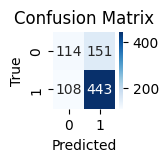

In [55]:
X_train_secured, X1_test_secured, X2_test_secured, vec = extr_tf(train_df, test_100_df, inductive=True)

train, test = extr_lsa(X_train_secured, X1_test_secured, X2_test_secured, vec, factor=True, n_comp=8/100)
X_train = train
y_train = train_df['label']

param = {'xgbclassifier__eta': 0.10956403322577613, 'xgbclassifier__n_estimators': 389, 'xgbclassifier__max_depth': 4, 'xgbclassifier__learning_rate': 0.011943270788670229, 'xgbclassifier__subsample': 0.5322246273506048, 'xgbclassifier__colsample_bytree': 0.7645849850697513, 'xgbclassifier__min_child_weight': 4, 'xgbclassifier__gamma': 3.407729229089508, 'xgbclassifier__reg_lambda': 3.419721702364318, 'xgbclassifier__objective': 'binary:hinge'}
param = {k:[v] for k,v in param.items()}
gs, model = xgb.fit_train_xgb(X_train, y_train, param=param)

/home/faizmuh/miniconda3/envs/skripsi/lib/python3.10/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


vocab size: 12112
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END xgbclassifier__colsample_bytree=0.7645849850697513, xgbclassifier__eta=0.10956403322577613, xgbclassifier__gamma=3.407729229089508, xgbclassifier__learning_rate=0.011943270788670229, xgbclassifier__max_depth=4, xgbclassifier__min_child_weight=4, xgbclassifier__n_estimators=389, xgbclassifier__objective=binary:hinge, xgbclassifier__reg_lambda=3.419721702364318, xgbclassifier__subsample=0.5322246273506048; total time= 2.2min
[CV] END xgbclassifier__colsample_bytree=0.7645849850697513, xgbclassifier__eta=0.10956403322577613, xgbclassifier__gamma=3.407729229089508, xgbclassifier__learning_rate=0.011943270788670229, xgbclassifier__max_depth=4, xgbclassifier__min_child_weight=4, xgbclassifier__n_estimators=389, xgbclassifier__objective=binary:hinge, xgbclassifier__reg_lambda=3.419721702364318, xgbclassifier__subsample=0.5322246273506048; total time= 2.1min
[CV] END xgbclassifier__colsample_bytree=0.76458498

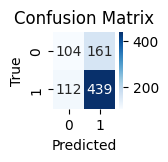

In [56]:
X_train_secured, X1_test_secured, X2_test_secured, vec = extr_tf(train_df, test_100_df, inductive=False)

train, test = extr_lsa(X_train_secured, X1_test_secured, X2_test_secured, vec, factor=True, n_comp=8/100)
X_train = train
y_train = train_df['label']

param = {'xgbclassifier__eta': 0.10956403322577613, 'xgbclassifier__n_estimators': 389, 'xgbclassifier__max_depth': 4, 'xgbclassifier__learning_rate': 0.011943270788670229, 'xgbclassifier__subsample': 0.5322246273506048, 'xgbclassifier__colsample_bytree': 0.7645849850697513, 'xgbclassifier__min_child_weight': 4, 'xgbclassifier__gamma': 3.407729229089508, 'xgbclassifier__reg_lambda': 3.419721702364318, 'xgbclassifier__objective': 'binary:hinge'}
param = {k:[v] for k,v in param.items()}
gs, model = xgb.fit_train_xgb(X_train, y_train, param=param)

/home/faizmuh/miniconda3/envs/skripsi/lib/python3.10/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


vocab size: 11961
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END xgbclassifier__colsample_bytree=0.7645849850697513, xgbclassifier__eta=0.10956403322577613, xgbclassifier__gamma=3.407729229089508, xgbclassifier__learning_rate=0.011943270788670229, xgbclassifier__max_depth=4, xgbclassifier__min_child_weight=4, xgbclassifier__n_estimators=389, xgbclassifier__objective=binary:hinge, xgbclassifier__reg_lambda=3.419721702364318, xgbclassifier__subsample=0.5322246273506048; total time= 1.8min
[CV] END xgbclassifier__colsample_bytree=0.7645849850697513, xgbclassifier__eta=0.10956403322577613, xgbclassifier__gamma=3.407729229089508, xgbclassifier__learning_rate=0.011943270788670229, xgbclassifier__max_depth=4, xgbclassifier__min_child_weight=4, xgbclassifier__n_estimators=389, xgbclassifier__objective=binary:hinge, xgbclassifier__reg_lambda=3.419721702364318, xgbclassifier__subsample=0.5322246273506048; total time= 1.8min
[CV] END xgbclassifier__colsample_bytree=0.76458498

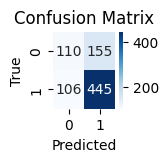

In [7]:
import classifiers.xgb as xgb

X_train_secured, X1_test_secured, X2_test_secured, vec = extr_tf(train_df, test_df, inductive=True)

train, test = extr_lsa(X_train_secured, X1_test_secured, X2_test_secured, vec, factor=True, n_comp=8/100)
X_train = train
y_train = train_df['label']

param = {'xgbclassifier__eta': 0.10956403322577613, 'xgbclassifier__n_estimators': 389, 'xgbclassifier__max_depth': 4, 'xgbclassifier__learning_rate': 0.011943270788670229, 'xgbclassifier__subsample': 0.5322246273506048, 'xgbclassifier__colsample_bytree': 0.7645849850697513, 'xgbclassifier__min_child_weight': 4, 'xgbclassifier__gamma': 3.407729229089508, 'xgbclassifier__reg_lambda': 3.419721702364318, 'xgbclassifier__objective': 'binary:hinge'}
param = {k:[v] for k,v in param.items()}
gs, model = xgb.fit_train_xgb(X_train, y_train, param=param)

/home/faizmuh/miniconda3/envs/skripsi/lib/python3.10/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


vocab size: 14675
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END xgbclassifier__colsample_bytree=0.7645849850697513, xgbclassifier__eta=0.10956403322577613, xgbclassifier__gamma=3.407729229089508, xgbclassifier__learning_rate=0.011943270788670229, xgbclassifier__max_depth=4, xgbclassifier__min_child_weight=4, xgbclassifier__n_estimators=389, xgbclassifier__objective=binary:hinge, xgbclassifier__reg_lambda=3.419721702364318, xgbclassifier__subsample=0.5322246273506048; total time= 3.0min
[CV] END xgbclassifier__colsample_bytree=0.7645849850697513, xgbclassifier__eta=0.10956403322577613, xgbclassifier__gamma=3.407729229089508, xgbclassifier__learning_rate=0.011943270788670229, xgbclassifier__max_depth=4, xgbclassifier__min_child_weight=4, xgbclassifier__n_estimators=389, xgbclassifier__objective=binary:hinge, xgbclassifier__reg_lambda=3.419721702364318, xgbclassifier__subsample=0.5322246273506048; total time= 2.9min
[CV] END xgbclassifier__colsample_bytree=0.76458498

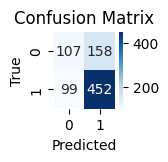

In [57]:
X_train_secured, X1_test_secured, X2_test_secured, vec = extr_tf(train_df, test_df, inductive=False)

train, test = extr_lsa(X_train_secured, X1_test_secured, X2_test_secured, vec, factor=True, n_comp=8/100)
X_train = train
y_train = train_df['label']

param = {'xgbclassifier__eta': 0.10956403322577613, 'xgbclassifier__n_estimators': 389, 'xgbclassifier__max_depth': 4, 'xgbclassifier__learning_rate': 0.011943270788670229, 'xgbclassifier__subsample': 0.5322246273506048, 'xgbclassifier__colsample_bytree': 0.7645849850697513, 'xgbclassifier__min_child_weight': 4, 'xgbclassifier__gamma': 3.407729229089508, 'xgbclassifier__reg_lambda': 3.419721702364318, 'xgbclassifier__objective': 'binary:hinge'}
param = {k:[v] for k,v in param.items()}
gs, model = xgb.fit_train_xgb(X_train, y_train, param=param)

# RF

/home/faizmuh/miniconda3/envs/skripsi/lib/python3.10/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


vocab size: 11961


[I 2024-06-29 23:17:23,837] A new study created in memory with name: no-name-9b0ba0e3-8c19-4cf2-8b22-3816cfa78a63
[I 2024-06-29 23:18:08,867] Trial 0 finished with value: 0.5653818625800987 and parameters: {'randomforestclassifier__n_estimators': 100, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_depth': 100, 'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_leaf_nodes': 1000, 'randomforestclassifier__bootstrap': True}. Best is trial 0 with value: 0.5653818625800987.
[I 2024-06-29 23:20:12,049] Trial 1 finished with value: 0.5766018880167645 and parameters: {'randomforestclassifier__n_estimators': 927, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_depth': 29, 'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_leaf_nodes': 11, 'randomforestclassifier__bootstrap': False}. Best is trial 1 with value: 0.5766018880167645.
[I 2024-06-29 23:24:48,173] Trial 2 finished with value: 0.581

Akurasi: 0.661
Presisi: 0.606
Recall: 0.600
F1 validasi: 0.602
Confusion Matrix:
[[113 152]
 [125 426]]


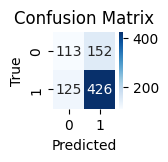

{'randomforestclassifier__n_estimators': 898, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_depth': 10, 'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_leaf_nodes': 729, 'randomforestclassifier__bootstrap': False}


In [58]:
X_train_secured, X1_test_secured, X2_test_secured, vec = extr_tf(train_df, test_100_df, inductive=True)

train, test = extr_lsa(X_train_secured, X1_test_secured, X2_test_secured, vec, factor=True, n_comp=1/100)
X_train = train
y_train = train_df['label']

import classifiers.rf as rf

study, model = rf.find_best_param_rf(X_train, y_train, n_trials=100, timeout=300)

[I 2024-06-30 02:28:12,246] A new study created in memory with name: no-name-bc4c5f72-21a4-4e70-b0f0-09d722a73319
[I 2024-06-30 02:28:53,830] Trial 0 finished with value: 0.5653818625800987 and parameters: {'randomforestclassifier__n_estimators': 100, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_depth': 100, 'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_leaf_nodes': 1000, 'randomforestclassifier__bootstrap': True}. Best is trial 0 with value: 0.5653818625800987.
[I 2024-06-30 02:32:49,449] Trial 1 finished with value: 0.5810960547028149 and parameters: {'randomforestclassifier__n_estimators': 898, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_depth': 10, 'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_leaf_nodes': 729, 'randomforestclassifier__bootstrap': False}. Best is trial 1 with value: 0.5810960547028149.
[I 2024-06-30 03:44:52,353] Trial 2 finished with value: 0.53

Akurasi: 0.661
Presisi: 0.606
Recall: 0.600
F1 validasi: 0.602
Confusion Matrix:
[[113 152]
 [125 426]]


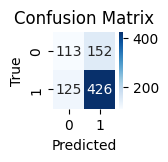

{'randomforestclassifier__n_estimators': 898, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_depth': 10, 'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_leaf_nodes': 729, 'randomforestclassifier__bootstrap': False}


In [59]:
list_param = [{'randomforestclassifier__n_estimators': 898, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_depth': 10, 'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_leaf_nodes': 729, 'randomforestclassifier__bootstrap': False}]
study, model = rf.find_best_param_rf(X_train, y_train, n_trials=100, timeout=300, list_param=list_param)


In [60]:
list_i = []
list_f1_rf = []
for i in range(1, 11):
    train, test = extr_lsa(X_train_secured, X1_test_secured, X2_test_secured, vec, factor=True, n_comp=i/100)
    X_train = train
    y_train = train_df['label']
    param = {'randomforestclassifier__n_estimators': 898, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_depth': 10, 'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_leaf_nodes': 729, 'randomforestclassifier__bootstrap': False}
    param = {k:[v] for k,v in param.items()}
    gs, model, f1 = rf.fit_train_loop_rf(X_train, y_train, param=param)
    list_i.append(i)
    list_f1_rf.append(f1)
    print(i)
    print(f1)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END randomforestclassifier__bootstrap=False, randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=10, randomforestclassifier__max_features=sqrt, randomforestclassifier__max_leaf_nodes=729, randomforestclassifier__n_estimators=898; total time= 2.9min
[CV] END randomforestclassifier__bootstrap=False, randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=10, randomforestclassifier__max_features=sqrt, randomforestclassifier__max_leaf_nodes=729, randomforestclassifier__n_estimators=898; total time= 3.1min
[CV] END randomforestclassifier__bootstrap=False, randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=10, randomforestclassifier__max_features=sqrt, randomforestclassifier__max_leaf_nodes=729, randomforestclassifier__n_estimators=898; total time= 2.7min
[CV] END randomforestclassifier__bootstrap=False, randomforestclassifier__criterion=gini, randomforestclassifier_

In [61]:
list_i[list_f1_rf.index(max(list_f1_rf))]


3

/home/faizmuh/miniconda3/envs/skripsi/lib/python3.10/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


vocab size: 11961
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END randomforestclassifier__bootstrap=False, randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=10, randomforestclassifier__max_features=sqrt, randomforestclassifier__max_leaf_nodes=729, randomforestclassifier__n_estimators=898; total time= 4.1min
[CV] END randomforestclassifier__bootstrap=False, randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=10, randomforestclassifier__max_features=sqrt, randomforestclassifier__max_leaf_nodes=729, randomforestclassifier__n_estimators=898; total time= 4.5min
[CV] END randomforestclassifier__bootstrap=False, randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=10, randomforestclassifier__max_features=sqrt, randomforestclassifier__max_leaf_nodes=729, randomforestclassifier__n_estimators=898; total time= 3.9min
[CV] END randomforestclassifier__bootstrap=False, randomforestclassifier__criterion=gini, rando

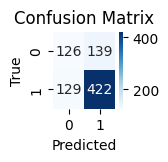

In [62]:
X_train_secured, X1_test_secured, X2_test_secured, vec = extr_tf(train_df, test_100_df, inductive=True)

train, test = extr_lsa(X_train_secured, X1_test_secured, X2_test_secured, vec, factor=True, n_comp=3/100)
X_train = train
y_train = train_df['label']

param = {'randomforestclassifier__n_estimators': 898, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_depth': 10, 'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_leaf_nodes': 729, 'randomforestclassifier__bootstrap': False}
param = {k:[v] for k,v in param.items()}
gs, model = rf.fit_train_rf(X_train, y_train, param=param)

/home/faizmuh/miniconda3/envs/skripsi/lib/python3.10/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


vocab size: 12112
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END randomforestclassifier__bootstrap=False, randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=10, randomforestclassifier__max_features=sqrt, randomforestclassifier__max_leaf_nodes=729, randomforestclassifier__n_estimators=898; total time= 4.5min
[CV] END randomforestclassifier__bootstrap=False, randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=10, randomforestclassifier__max_features=sqrt, randomforestclassifier__max_leaf_nodes=729, randomforestclassifier__n_estimators=898; total time= 4.5min
[CV] END randomforestclassifier__bootstrap=False, randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=10, randomforestclassifier__max_features=sqrt, randomforestclassifier__max_leaf_nodes=729, randomforestclassifier__n_estimators=898; total time= 4.8min
[CV] END randomforestclassifier__bootstrap=False, randomforestclassifier__criterion=gini, rando

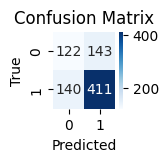

In [63]:
X_train_secured, X1_test_secured, X2_test_secured, vec = extr_tf(train_df, test_100_df, inductive=False)

train, test = extr_lsa(X_train_secured, X1_test_secured, X2_test_secured, vec, factor=True, n_comp=3/100)
X_train = train
y_train = train_df['label']

param = {'randomforestclassifier__n_estimators': 898, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_depth': 10, 'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_leaf_nodes': 729, 'randomforestclassifier__bootstrap': False}
param = {k:[v] for k,v in param.items()}
gs, model = rf.fit_train_rf(X_train, y_train, param=param)

In [26]:
import classifiers.rf as rf
X_train_secured, X1_test_secured, X2_test_secured, vec = extr_tf(train_df, test_df, inductive=False)

train, test = extr_lsa(X_train_secured, X1_test_secured, X2_test_secured, vec, factor=True, n_comp=3/100)
X_train = pd.DataFrame.sparse.from_spmatrix(train)
y_train = train_df['label']

param = {'randomforestclassifier__n_estimators': 898, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_depth': 10, 'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_leaf_nodes': 729, 'randomforestclassifier__bootstrap': False}
param = {k:[v] for k,v in param.items()}
gs, model = rf.fit_train_rf(X_train, y_train, param=param)

/home/faizmuh/miniconda3/envs/skripsi/lib/python3.10/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


vocab size: 14675
Fitting 5 folds for each of 1 candidates, totalling 5 fits


KeyboardInterrupt: 

In [ ]:
import joblib

joblib.dump(model, 'model/best_model_lsa_pagerank.pkl')

['model/best_model_lsa_pagerank.pkl']

<4076x880 sparse matrix of type '<class 'numpy.float64'>'
	with 3578960 stored elements in Compressed Sparse Row format>

In [20]:
sparse_df = pd.DataFrame.sparse.from_spmatrix(train)

sparse_df.to_csv("data/features/feat_exp_3_b_train.csv", index=False)

In [21]:
sparse_df = pd.DataFrame.sparse.from_spmatrix(test)

sparse_df.to_csv("data/features/feat_exp_3_b_test.csv", index=False)

In [22]:
X_train_secured, X1_test_secured, X2_test_secured, vec = extr_tf(train_df, test_100_df, inductive=False)

train, test = extr_lsa(X_train_secured, X1_test_secured, X2_test_secured, vec, factor=True, n_comp=3/100)


/home/faizmuh/miniconda3/envs/skripsi/lib/python3.10/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


vocab size: 12112


In [23]:
sparse_df = pd.DataFrame.sparse.from_spmatrix(test)

sparse_df.to_csv("data/features/feat_exp_3_b_test_100.csv", index=False)

In [24]:
sparse_df

,0,1,2,3,4,5,6,7,8,9,...,716,717,718,719,720,721,722,723,724,725
0,0.000251,0.000231,0.0004,0.0,0.000966,0.000093,0.000642,0.000852,-0.000326,0.000527,...,0.000212,0.002484,0.003963,0.001267,0.002514,0.011568,0.000271,0.002612,0.002482,0.006205
1,0.00011,0.000054,0.000026,0.000006,0.000058,0.000112,0.000014,0.000026,-0.000028,0.000011,...,0.0001,0.002671,0.001684,0.001298,0.000542,0.000111,0.001023,0.000959,0.003097,0.003508
2,0.000441,0.000172,0.000117,-0.00026,0.000522,0.000313,0.000276,0.000135,-0.000248,0.000368,...,0.002989,0.003608,0.00002,0.012531,0.003592,0.001789,0.007847,0.000242,0.001511,0.009649
3,1.223162,-0.036074,-0.044463,0.702962,-0.035921,0.057248,-0.000062,-0.001496,-0.002559,-0.023868,...,0.000155,0.000031,0.001763,0.000345,0.001239,0.000546,0.000497,0.000309,0.001433,0.000207
4,0.000636,0.000608,0.000227,0.000141,0.001055,0.00062,0.000312,0.000723,-0.000321,0.000063,...,0.001288,0.001752,0.002817,0.007835,0.00337,0.001458,0.001748,0.007675,0.000575,0.002058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000275,0.000284,0.000259,-0.000047,0.000718,0.000178,0.000083,0.000247,-0.000057,0.000614,...,0.000154,0.000928,0.000474,0.000534,0.00223,0.000665,0.001979,0.003624,0.004031,0.001934
96,0.000409,0.00051,0.000217,0.000044,0.00068,0.000525,0.000056,0.000508,-0.000232,0.00034,...,0.000801,0.00294,0.002799,0.005087,0.00135,0.008378,0.000044,0.004613,0.002554,0.002854
97,0.1191,2.463134,-0.000136,0.062933,-0.052283,-0.110844,-0.000068,-0.040736,0.461593,-0.002901,...,0.000066,0.001635,0.002674,0.001595,0.00055,0.005358,0.002137,0.000896,0.00063,0.00371
98,0.000173,0.000082,0.000065,-0.000068,0.000259,0.000054,0.000095,0.000185,-0.000074,0.000078,...,0.002286,0.00062,0.000831,0.008589,0.005526,0.010409,0.020991,0.007177,0.005353,0.006317


/home/faizmuh/miniconda3/envs/skripsi/lib/python3.10/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


vocab size: 12112
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END randomforestclassifier__bootstrap=False, randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=10, randomforestclassifier__max_features=sqrt, randomforestclassifier__max_leaf_nodes=729, randomforestclassifier__n_estimators=898; total time= 4.4min
[CV] END randomforestclassifier__bootstrap=False, randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=10, randomforestclassifier__max_features=sqrt, randomforestclassifier__max_leaf_nodes=729, randomforestclassifier__n_estimators=898; total time= 4.2min
[CV] END randomforestclassifier__bootstrap=False, randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=10, randomforestclassifier__max_features=sqrt, randomforestclassifier__max_leaf_nodes=729, randomforestclassifier__n_estimators=898; total time= 4.3min
[CV] END randomforestclassifier__bootstrap=False, randomforestclassifier__criterion=gini, rando

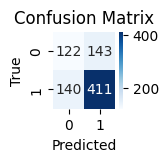

In [27]:
import classifiers.rf as rf
X_train_secured, X1_test_secured, X2_test_secured, vec = extr_tf(train_df, test_100_df, inductive=False)

train, test = extr_lsa(X_train_secured, X1_test_secured, X2_test_secured, vec, factor=True, n_comp=3/100)
X_train = train
y_train = train_df['label']

param = {'randomforestclassifier__n_estimators': 898, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_depth': 10, 'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_leaf_nodes': 729, 'randomforestclassifier__bootstrap': False}
param = {k:[v] for k,v in param.items()}
gs, model = rf.fit_train_rf(X_train, y_train, param=param)

In [28]:
import joblib

joblib.dump(model, 'model/model_lsa_pagerank_100.pkl')

['model/model_lsa_pagerank_100.pkl']

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END randomforestclassifier__bootstrap=False, randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=10, randomforestclassifier__max_features=sqrt, randomforestclassifier__max_leaf_nodes=729, randomforestclassifier__n_estimators=898; total time= 4.4min
[CV] END randomforestclassifier__bootstrap=False, randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=10, randomforestclassifier__max_features=sqrt, randomforestclassifier__max_leaf_nodes=729, randomforestclassifier__n_estimators=898; total time= 4.5min
[CV] END randomforestclassifier__bootstrap=False, randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=10, randomforestclassifier__max_features=sqrt, randomforestclassifier__max_leaf_nodes=729, randomforestclassifier__n_estimators=898; total time= 4.3min
[CV] END randomforestclassifier__bootstrap=False, randomforestclassifier__criterion=gini, randomforestclassifier_

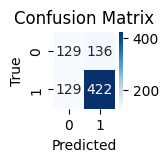

In [13]:
import classifiers.rf as rf

X_train = sparse_df
y_train = train_df['label']

param = {'randomforestclassifier__n_estimators': 898, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_depth': 10, 'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_leaf_nodes': 729, 'randomforestclassifier__bootstrap': False}
param = {k:[v] for k,v in param.items()}
gs, model = rf.fit_train_rf(X_train, y_train, param=param)

/home/faizmuh/miniconda3/envs/skripsi/lib/python3.10/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


vocab size: 11961
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END randomforestclassifier__bootstrap=False, randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=10, randomforestclassifier__max_features=sqrt, randomforestclassifier__max_leaf_nodes=729, randomforestclassifier__n_estimators=898; total time= 3.6min
[CV] END randomforestclassifier__bootstrap=False, randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=10, randomforestclassifier__max_features=sqrt, randomforestclassifier__max_leaf_nodes=729, randomforestclassifier__n_estimators=898; total time= 3.8min
[CV] END randomforestclassifier__bootstrap=False, randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=10, randomforestclassifier__max_features=sqrt, randomforestclassifier__max_leaf_nodes=729, randomforestclassifier__n_estimators=898; total time= 3.4min
[CV] END randomforestclassifier__bootstrap=False, randomforestclassifier__criterion=gini, rando

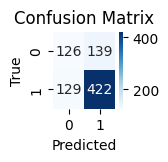

In [65]:
X_train_secured, X1_test_secured, X2_test_secured, vec = extr_tf(train_df, test_df, inductive=True)

train, test = extr_lsa(X_train_secured, X1_test_secured, X2_test_secured, vec, factor=True, n_comp=3/100)
X_train = train
y_train = train_df['label']

param = {'randomforestclassifier__n_estimators': 898, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_depth': 10, 'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_leaf_nodes': 729, 'randomforestclassifier__bootstrap': False}
param = {k:[v] for k,v in param.items()}
gs, model = rf.fit_train_rf(X_train, y_train, param=param)

# lgbm

In [10]:
import classifiers.lgbm as lgbm
X_train_secured, X1_test_secured, X2_test_secured, vec = extr_tf(train_df, test_100_df, inductive=True)



/home/faizmuh/miniconda3/envs/skripsi/lib/python3.10/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


vocab size: 11961


In [70]:
train, test = extr_lsa(X_train_secured, X1_test_secured, X2_test_secured, vec, factor=True, n_comp=1/100)
X_train = train
y_train = train_df['label']

[I 2024-06-30 17:04:53,217] A new study created in memory with name: no-name-ed5defc0-d88c-457a-af84-8c4ea27ab11e
[I 2024-06-30 17:06:10,348] Trial 0 finished with value: 0.5705756915771673 and parameters: {'lgbmclassifier__num_leaves': 31, 'lgbmclassifier__min_data_in_leaf': 20, 'lgbmclassifier__max_depth': -1, 'lgbmclassifier__learning_rate': 0.1, 'lgbmclassifier__n_estimators': 100, 'lgbmclassifier__subsample': 1.0, 'lgbmclassifier__colsample_bytree': 1.0, 'lgbmclassifier__reg_alpha': 0.0, 'lgbmclassifier__reg_lambda': 0.0, 'lgbmclassifier__boosting': 'gbdt'}. Best is trial 0 with value: 0.5705756915771673.
[I 2024-06-30 17:07:09,944] Trial 1 finished with value: 0.5705756915771673 and parameters: {'lgbmclassifier__num_leaves': 31, 'lgbmclassifier__min_data_in_leaf': 20, 'lgbmclassifier__max_depth': -1, 'lgbmclassifier__learning_rate': 0.1, 'lgbmclassifier__n_estimators': 100, 'lgbmclassifier__subsample': 1.0, 'lgbmclassifier__colsample_bytree': 1.0, 'lgbmclassifier__reg_alpha': 0.0

Akurasi: 0.640
Presisi: 0.573
Recall: 0.565
F1 validasi: 0.566
Confusion Matrix:
[[ 93 172]
 [122 429]]


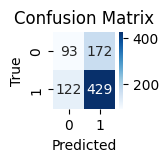

{'lgbmclassifier__num_leaves': 31, 'lgbmclassifier__min_data_in_leaf': 20, 'lgbmclassifier__max_depth': -1, 'lgbmclassifier__learning_rate': 0.1, 'lgbmclassifier__n_estimators': 100, 'lgbmclassifier__subsample': 1.0, 'lgbmclassifier__colsample_bytree': 1.0, 'lgbmclassifier__reg_alpha': 0.0, 'lgbmclassifier__reg_lambda': 0.0, 'lgbmclassifier__boosting': 'gbdt'}


In [71]:
param = [{'lgbmclassifier__num_leaves': 31, 'lgbmclassifier__min_data_in_leaf': 20, 'lgbmclassifier__max_depth': -1, 'lgbmclassifier__learning_rate': 0.1, 'lgbmclassifier__n_estimators': 100, 'lgbmclassifier__subsample': 1.0, 'lgbmclassifier__colsample_bytree': 1.0, 'lgbmclassifier__reg_alpha': 0.0, 'lgbmclassifier__reg_lambda': 0.0, 'lgbmclassifier__boosting': 'gbdt'}]
study, model = lgbm.find_best_param_lgbm(X_train, y_train, timeout=300, list_param=param)


/home/faizmuh/miniconda3/envs/skripsi/lib/python3.10/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


vocab size: 11961
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END lgbmclassifier__boosting=gbdt, lgbmclassifier__colsample_bytree=1.0, lgbmclassifier__learning_rate=0.1, lgbmclassifier__max_depth=-1, lgbmclassifier__min_data_in_leaf=20, lgbmclassifier__n_estimators=100, lgbmclassifier__num_leaves=31, lgbmclassifier__reg_alpha=0.0, lgbmclassifier__reg_lambda=0.0, lgbmclassifier__subsample=1.0; total time=  34.7s
[CV] END lgbmclassifier__boosting=gbdt, lgbmclassifier__colsample_bytree=1.0, lgbmclassifier__learning_rate=0.1, lgbmclassifier__max_depth=-1, lgbmclassifier__min_data_in_leaf=20, lgbmclassifier__n_estimators=100, lgbmclassifier__num_leaves=31, lgbmclassifier__reg_alpha=0.0, lgbmclassifier__reg_lambda=0.0, lgbmclassifier__subsample=1.0; total time=  35.4s
[CV] END lgbmclassifier__boosting=gbdt, lgbmclassifier__colsample_bytree=1.0, lgbmclassifier__learning_rate=0.1, lgbmclassifier__max_depth=-1, lgbmclassifier__min_data_in_leaf=20, lgbmclassifier__n_estimator

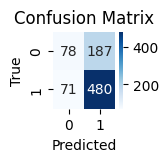

In [67]:
import classifiers.lgbm as lgbm

X_train_secured, X1_test_secured, X2_test_secured, vec = extr_tf(train_df, test_100_df, inductive=True)

train, test = extr_lsa(X_train_secured, X1_test_secured, X2_test_secured, vec, factor=True, n_comp=10/100)
X_train = train
y_train = train_df['label']

param = {'lgbmclassifier__num_leaves': 31, 'lgbmclassifier__min_data_in_leaf': 20, 'lgbmclassifier__max_depth': -1, 'lgbmclassifier__learning_rate': 0.1, 'lgbmclassifier__n_estimators': 100, 'lgbmclassifier__subsample': 1.0, 'lgbmclassifier__colsample_bytree': 1.0, 'lgbmclassifier__reg_alpha': 0.0, 'lgbmclassifier__reg_lambda': 0.0, 'lgbmclassifier__boosting': 'gbdt'}
param = {k:[v] for k,v in param.items()}
gs, model = lgbm.fit_train_lgbm(X_train, y_train, param=param)

In [11]:
list_f1_lgbm = []
list_i = []
for i in range(1, 11):
    train, test = extr_lsa(X_train_secured, X1_test_secured, X2_test_secured, vec, factor=True, n_comp=i/100)
    X_train = train
    y_train = train_df['label']
    param = {'lgbmclassifier__num_leaves': 31, 'lgbmclassifier__min_data_in_leaf': 20, 'lgbmclassifier__max_depth': -1, 'lgbmclassifier__learning_rate': 0.1, 'lgbmclassifier__n_estimators': 100, 'lgbmclassifier__subsample': 1.0, 'lgbmclassifier__colsample_bytree': 1.0, 'lgbmclassifier__reg_alpha': 0.0, 'lgbmclassifier__reg_lambda': 0.0, 'lgbmclassifier__boosting': 'gbdt'}
    param = {k:[v] for k,v in param.items()}
    gs, model, f1 = lgbm.fit_train_loop_lgbm(X_train, y_train, param=param)
    list_i.append(i)
    list_f1_lgbm.append(f1)
    print(i)
    print(f1)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END lgbmclassifier__boosting=gbdt, lgbmclassifier__colsample_bytree=1.0, lgbmclassifier__learning_rate=0.1, lgbmclassifier__max_depth=-1, lgbmclassifier__min_data_in_leaf=20, lgbmclassifier__n_estimators=100, lgbmclassifier__num_leaves=31, lgbmclassifier__reg_alpha=0.0, lgbmclassifier__reg_lambda=0.0, lgbmclassifier__subsample=1.0; total time=   2.4s
[CV] END lgbmclassifier__boosting=gbdt, lgbmclassifier__colsample_bytree=1.0, lgbmclassifier__learning_rate=0.1, lgbmclassifier__max_depth=-1, lgbmclassifier__min_data_in_leaf=20, lgbmclassifier__n_estimators=100, lgbmclassifier__num_leaves=31, lgbmclassifier__reg_alpha=0.0, lgbmclassifier__reg_lambda=0.0, lgbmclassifier__subsample=1.0; total time=   2.4s
[CV] END lgbmclassifier__boosting=gbdt, lgbmclassifier__colsample_bytree=1.0, lgbmclassifier__learning_rate=0.1, lgbmclassifier__max_depth=-1, lgbmclassifier__min_data_in_leaf=20, lgbmclassifier__n_estimators=100, lgbmclassif

/home/faizmuh/miniconda3/envs/skripsi/lib/python3.10/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


vocab size: 11961
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END lgbmclassifier__boosting=gbdt, lgbmclassifier__colsample_bytree=1.0, lgbmclassifier__learning_rate=0.1, lgbmclassifier__max_depth=-1, lgbmclassifier__min_data_in_leaf=20, lgbmclassifier__n_estimators=100, lgbmclassifier__num_leaves=31, lgbmclassifier__reg_alpha=0.0, lgbmclassifier__reg_lambda=0.0, lgbmclassifier__subsample=1.0; total time=   7.6s
[CV] END lgbmclassifier__boosting=gbdt, lgbmclassifier__colsample_bytree=1.0, lgbmclassifier__learning_rate=0.1, lgbmclassifier__max_depth=-1, lgbmclassifier__min_data_in_leaf=20, lgbmclassifier__n_estimators=100, lgbmclassifier__num_leaves=31, lgbmclassifier__reg_alpha=0.0, lgbmclassifier__reg_lambda=0.0, lgbmclassifier__subsample=1.0; total time=   7.8s
[CV] END lgbmclassifier__boosting=gbdt, lgbmclassifier__colsample_bytree=1.0, lgbmclassifier__learning_rate=0.1, lgbmclassifier__max_depth=-1, lgbmclassifier__min_data_in_leaf=20, lgbmclassifier__n_estimator

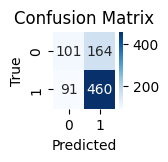

In [9]:
import classifiers.lgbm as lgbm

X_train_secured, X1_test_secured, X2_test_secured, vec = extr_tf(train_df, test_100_df, inductive=True)

train, test = extr_lsa(X_train_secured, X1_test_secured, X2_test_secured, vec, factor=True, n_comp=3/100)
X_train = train
y_train = train_df['label']

param = {'lgbmclassifier__num_leaves': 31, 'lgbmclassifier__min_data_in_leaf': 20, 'lgbmclassifier__max_depth': -1, 'lgbmclassifier__learning_rate': 0.1, 'lgbmclassifier__n_estimators': 100, 'lgbmclassifier__subsample': 1.0, 'lgbmclassifier__colsample_bytree': 1.0, 'lgbmclassifier__reg_alpha': 0.0, 'lgbmclassifier__reg_lambda': 0.0, 'lgbmclassifier__boosting': 'gbdt'}
param = {k:[v] for k,v in param.items()}
gs, model = lgbm.fit_train_lgbm(X_train, y_train, param=param)

/home/faizmuh/miniconda3/envs/skripsi/lib/python3.10/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


vocab size: 12112
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END lgbmclassifier__boosting=gbdt, lgbmclassifier__colsample_bytree=1.0, lgbmclassifier__learning_rate=0.1, lgbmclassifier__max_depth=-1, lgbmclassifier__min_data_in_leaf=20, lgbmclassifier__n_estimators=100, lgbmclassifier__num_leaves=31, lgbmclassifier__reg_alpha=0.0, lgbmclassifier__reg_lambda=0.0, lgbmclassifier__subsample=1.0; total time=   7.8s
[CV] END lgbmclassifier__boosting=gbdt, lgbmclassifier__colsample_bytree=1.0, lgbmclassifier__learning_rate=0.1, lgbmclassifier__max_depth=-1, lgbmclassifier__min_data_in_leaf=20, lgbmclassifier__n_estimators=100, lgbmclassifier__num_leaves=31, lgbmclassifier__reg_alpha=0.0, lgbmclassifier__reg_lambda=0.0, lgbmclassifier__subsample=1.0; total time=   8.0s
[CV] END lgbmclassifier__boosting=gbdt, lgbmclassifier__colsample_bytree=1.0, lgbmclassifier__learning_rate=0.1, lgbmclassifier__max_depth=-1, lgbmclassifier__min_data_in_leaf=20, lgbmclassifier__n_estimator

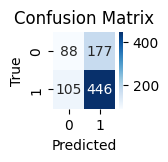

In [10]:
import classifiers.lgbm as lgbm

X_train_secured, X1_test_secured, X2_test_secured, vec = extr_tf(train_df, test_100_df, inductive=False)

train, test = extr_lsa(X_train_secured, X1_test_secured, X2_test_secured, vec, factor=True, n_comp=3/100)
X_train = train
y_train = train_df['label']

param = {'lgbmclassifier__num_leaves': 31, 'lgbmclassifier__min_data_in_leaf': 20, 'lgbmclassifier__max_depth': -1, 'lgbmclassifier__learning_rate': 0.1, 'lgbmclassifier__n_estimators': 100, 'lgbmclassifier__subsample': 1.0, 'lgbmclassifier__colsample_bytree': 1.0, 'lgbmclassifier__reg_alpha': 0.0, 'lgbmclassifier__reg_lambda': 0.0, 'lgbmclassifier__boosting': 'gbdt'}
param = {k:[v] for k,v in param.items()}
gs, model = lgbm.fit_train_lgbm(X_train, y_train, param=param)

/home/faizmuh/miniconda3/envs/skripsi/lib/python3.10/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


vocab size: 11961
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END lgbmclassifier__boosting=gbdt, lgbmclassifier__colsample_bytree=1.0, lgbmclassifier__learning_rate=0.1, lgbmclassifier__max_depth=-1, lgbmclassifier__min_data_in_leaf=20, lgbmclassifier__n_estimators=100, lgbmclassifier__num_leaves=31, lgbmclassifier__reg_alpha=0.0, lgbmclassifier__reg_lambda=0.0, lgbmclassifier__subsample=1.0; total time=   7.5s
[CV] END lgbmclassifier__boosting=gbdt, lgbmclassifier__colsample_bytree=1.0, lgbmclassifier__learning_rate=0.1, lgbmclassifier__max_depth=-1, lgbmclassifier__min_data_in_leaf=20, lgbmclassifier__n_estimators=100, lgbmclassifier__num_leaves=31, lgbmclassifier__reg_alpha=0.0, lgbmclassifier__reg_lambda=0.0, lgbmclassifier__subsample=1.0; total time=   7.5s
[CV] END lgbmclassifier__boosting=gbdt, lgbmclassifier__colsample_bytree=1.0, lgbmclassifier__learning_rate=0.1, lgbmclassifier__max_depth=-1, lgbmclassifier__min_data_in_leaf=20, lgbmclassifier__n_estimator

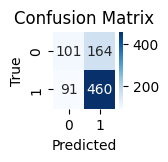

In [11]:
import classifiers.lgbm as lgbm

X_train_secured, X1_test_secured, X2_test_secured, vec = extr_tf(train_df, test_df, inductive=True)

train, test = extr_lsa(X_train_secured, X1_test_secured, X2_test_secured, vec, factor=True, n_comp=3/100)
X_train = train
y_train = train_df['label']

param = {'lgbmclassifier__num_leaves': 31, 'lgbmclassifier__min_data_in_leaf': 20, 'lgbmclassifier__max_depth': -1, 'lgbmclassifier__learning_rate': 0.1, 'lgbmclassifier__n_estimators': 100, 'lgbmclassifier__subsample': 1.0, 'lgbmclassifier__colsample_bytree': 1.0, 'lgbmclassifier__reg_alpha': 0.0, 'lgbmclassifier__reg_lambda': 0.0, 'lgbmclassifier__boosting': 'gbdt'}
param = {k:[v] for k,v in param.items()}
gs, model = lgbm.fit_train_lgbm(X_train, y_train, param=param)

/home/faizmuh/miniconda3/envs/skripsi/lib/python3.10/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


vocab size: 14675
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END lgbmclassifier__boosting=gbdt, lgbmclassifier__colsample_bytree=1.0, lgbmclassifier__learning_rate=0.1, lgbmclassifier__max_depth=-1, lgbmclassifier__min_data_in_leaf=20, lgbmclassifier__n_estimators=100, lgbmclassifier__num_leaves=31, lgbmclassifier__reg_alpha=0.0, lgbmclassifier__reg_lambda=0.0, lgbmclassifier__subsample=1.0; total time=   9.4s
[CV] END lgbmclassifier__boosting=gbdt, lgbmclassifier__colsample_bytree=1.0, lgbmclassifier__learning_rate=0.1, lgbmclassifier__max_depth=-1, lgbmclassifier__min_data_in_leaf=20, lgbmclassifier__n_estimators=100, lgbmclassifier__num_leaves=31, lgbmclassifier__reg_alpha=0.0, lgbmclassifier__reg_lambda=0.0, lgbmclassifier__subsample=1.0; total time=   9.9s
[CV] END lgbmclassifier__boosting=gbdt, lgbmclassifier__colsample_bytree=1.0, lgbmclassifier__learning_rate=0.1, lgbmclassifier__max_depth=-1, lgbmclassifier__min_data_in_leaf=20, lgbmclassifier__n_estimator

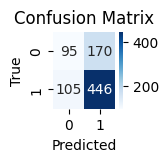

In [12]:
import classifiers.lgbm as lgbm

X_train_secured, X1_test_secured, X2_test_secured, vec = extr_tf(train_df, test_df, inductive=False)

train, test = extr_lsa(X_train_secured, X1_test_secured, X2_test_secured, vec, factor=True, n_comp=3/100)
X_train = train
y_train = train_df['label']

param = {'lgbmclassifier__num_leaves': 31, 'lgbmclassifier__min_data_in_leaf': 20, 'lgbmclassifier__max_depth': -1, 'lgbmclassifier__learning_rate': 0.1, 'lgbmclassifier__n_estimators': 100, 'lgbmclassifier__subsample': 1.0, 'lgbmclassifier__colsample_bytree': 1.0, 'lgbmclassifier__reg_alpha': 0.0, 'lgbmclassifier__reg_lambda': 0.0, 'lgbmclassifier__boosting': 'gbdt'}
param = {k:[v] for k,v in param.items()}
gs, model = lgbm.fit_train_lgbm(X_train, y_train, param=param)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the following variables:
# y_true: actual labels
# y_pred: predicted labels
# X_test: features for the test set
# sentences: list of sentence pairs

# Step 1: Calculate confusion matrix and classification report
cm = confusion_matrix(y_true, y_pred)
report = classification_report(y_true, y_pred, target_names=["Not Paraphrase", "Paraphrase"])

print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", report)

# Step 2: Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Paraphrase", "Paraphrase"], yticklabels=["Not Paraphrase", "Paraphrase"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Step 3: Identify incorrect predictions
incorrect_indices = np.where(y_true != y_pred)[0]
incorrect_predictions = [(sentences[i], y_true[i], y_pred[i]) for i in incorrect_indices]

# Inspect some incorrect predictions
for idx, (sentence_pair, true_label, pred_label) in enumerate(incorrect_predictions[:5]):
    print(f"Example {idx + 1}:")
    print(f"Sentence Pair: {sentence_pair}")
    print(f"True Label: {true_label}, Predicted Label: {pred_label}")
    print("-" * 50)

# Step 4: Feature analysis (example of inspecting AMR features)
def inspect_features(index):
    amr_graph_1, amr_graph_2 = X_test[index]  # Assuming X_test contains AMR graph features
    print(f"AMR Graph 1:\n{amr_graph_1}")
    print(f"AMR Graph 2:\n{amr_graph_2}")

# Inspect features for the first incorrect prediction
inspect_features(incorrect_indices[0])
